In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
#import and read dataset
df=pd.read_csv("UScomments.csv", error_bad_lines=False)
videos=pd.read_csv('USvideos.csv', error_bad_lines=False)


b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [3]:
videos

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7987,xlu6i6lT_vk,How Do MASSIVE Sinkholes Form?,Life Noggin,27,sinkhole|how do sinkholes form|sinkhole in wat...,440393,14362,390,1575,https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg,22.10
7988,qRoVlH1OcI4,Trump slams Clinton for defending NFL anthem p...,Business Insider,25,Business Insider|Donald Trump|Hillary Clinton|...,55762,1265,760,1873,https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg,22.10
7989,EoejGgUNmVU,LP - Lost On You (A Night at The McKittrick Ho...,LP,10,LP|Death Valley|Other People|Lost On You|The M...,142908,7088,68,437,https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg,22.10
7990,MT1CMTI0EVw,Tré Melvin @ #YouTubeBlack FanFest Washington ...,YouTube FanFest,24,YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...,24532,2148,77,0,https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg,22.10


In [4]:
df


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [5]:
from textblob import TextBlob
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [6]:
df=df.iloc[0:2000,:]
polarity=[] 
for i in df['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)

In [7]:
df['polarity']=polarity

In [8]:
df

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
...,...,...,...,...,...
1995,-Ifnaxi2LQg,¿Soy La Unica Que Habla Español? 😞🌴,2,0,0.000000
1996,-Ifnaxi2LQg,"Fergie e Nicki, a melhor dupla que você respei...",0,0,0.000000
1997,-Ifnaxi2LQg,Fazer uma participação pequena na música de Ar...,0,0,0.000000
1998,B7YaMkCl3XA,"I got hit by Hurricane Irma too, but it wasn't...",3,0,-0.600000


In [9]:
#positive comments

comments_positive = df[df['polarity']==1]
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [10]:
import matplotlib.pyplot as plt
% matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


stopwords=set(STOPWORDS)

(-0.5, 999.5, 499.5, -0.5)

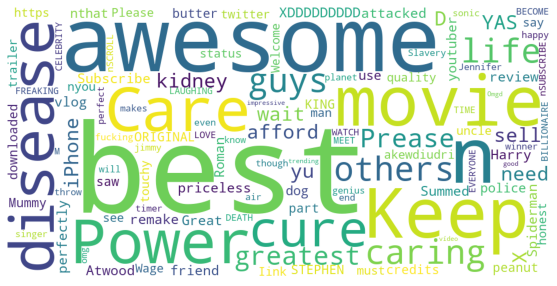

In [11]:
total_comments= (' '.join(comments_positive['comment_text']))

wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords,background_color="white").generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

In [12]:
#negative

negative_comment = df[df['polarity']==-1]
 

(-0.5, 999.5, 499.5, -0.5)

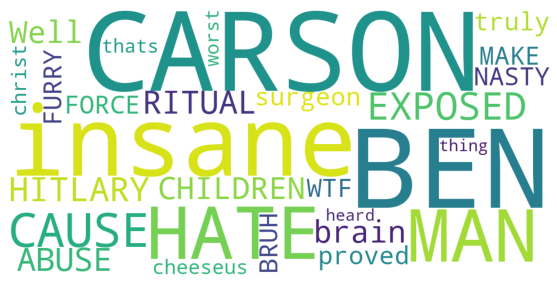

In [13]:
negative_comment = (' '.join(negative_comment['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords,background_color="white").generate(negative_comment)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

# trending tags on youtube

In [14]:
tags_complete= (' '.join(videos['tags']))  

In [15]:
import re
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [16]:
tags=re.sub(' +',' ',tags)

In [17]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

(-0.5, 999.5, 499.5, -0.5)

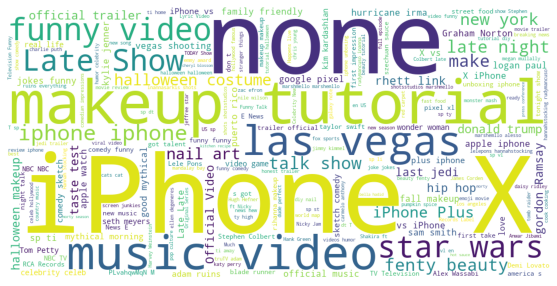

In [18]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=set(STOPWORDS),background_color="white").generate(tags)# word cloud


plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for dislikes & views')

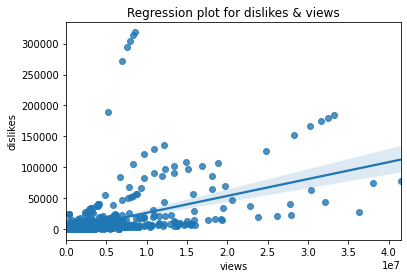

In [19]:
import seaborn as sns
sns.regplot(data=videos,x='views',y='dislikes')
plt.title("Regression plot for dislikes & views")

Text(0.5, 1.0, 'Regression plot for dislikes & views')

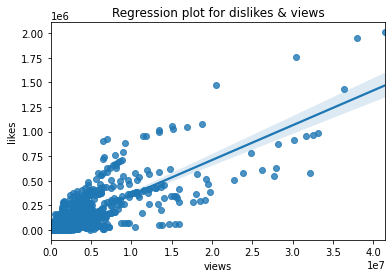

In [20]:
sns.regplot(data=videos,x='views',y='likes')
plt.title("Regression plot for dislikes & views")

In [21]:
df.head()


,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [22]:
import emoji


In [23]:
df['comment_text'].dropna(inplace=True)

In [24]:
len(df)

2000

In [25]:
comment='trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😉']

In [26]:
str=''
for i in df['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [27]:
print(str)

‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏🇪🇸😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕


In [28]:
res = {i : str.count(i) for i in set(str)} 
res

{'‼': 3,
 '™': 1,
 '☹': 1,
 '☺': 2,
 '♀': 1,
 '♂': 1,
 '✌': 1,
 '✨': 1,
 '❤': 55,
 '🇪': 1,
 '🇸': 1,
 '🌟': 6,
 '🌮': 5,
 '🌳': 1,
 '🌴': 1,
 '🌽': 1,
 '🍎': 2,
 '🍏': 1,
 '🎃': 1,
 '🎉': 1,
 '🏻': 7,
 '🏼': 2,
 '🏽': 2,
 '🏿': 1,
 '🐂': 1,
 '👀': 2,
 '👅': 1,
 '👇': 1,
 '👈': 8,
 '👌': 5,
 '👍': 6,
 '👎': 5,
 '👏': 17,
 '👑': 4,
 '👫': 2,
 '👻': 1,
 '💀': 1,
 '💆': 1,
 '💋': 9,
 '💎': 1,
 '💓': 7,
 '💔': 2,
 '💕': 4,
 '💖': 15,
 '💗': 2,
 '💘': 2,
 '💙': 2,
 '💜': 7,
 '💝': 2,
 '💦': 1,
 '💩': 1,
 '🔥': 21,
 '😀': 2,
 '😁': 8,
 '😂': 184,
 '😃': 4,
 '😄': 2,
 '😅': 2,
 '😆': 14,
 '😉': 3,
 '😊': 14,
 '😋': 3,
 '😍': 35,
 '😎': 2,
 '😏': 2,
 '😐': 2,
 '😑': 1,
 '😒': 2,
 '😓': 1,
 '😔': 2,
 '😕': 2,
 '😘': 3,
 '😛': 1,
 '😝': 1,
 '😞': 4,
 '😠': 2,
 '😡': 1,
 '😢': 5,
 '😤': 1,
 '😩': 3,
 '😬': 1,
 '😭': 11,
 '😮': 27,
 '😱': 9,
 '😳': 3,
 '😴': 4,
 '😻': 2,
 '🙌': 3,
 '🙏': 3,
 '🚂': 1,
 '🚣': 1,
 '🤔': 3,
 '🤘': 1,
 '🤣': 7,
 '🤦': 1,
 '🤷': 1}

In [29]:
keys=[*res.keys()]
values=[*res.values()]

In [30]:
dfe = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})
dfe


,chars,num
0,😂,184
1,😡,1
2,👻,1
3,🙌,3
4,😋,3
5,🙏,3
6,😱,9
7,💕,4
8,🏼,2
9,🍎,2


In [31]:
df=df.to_csv("analyseSet.csv")